# 결측치 제거

In [1]:
import pandas as pd

pd.options.display.float_format = '{:.5f}'.format

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_1.csv')

print(df.isnull().sum())
print(df.isna().sum()/len(df))

df = df.drop(columns = df.columns[df.isna().sum()/len(df) > 0.13], axis = 1)

print(df.isna().sum()/len(df))

df = df.dropna(axis=0)

df = df.drop(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'MESURE_PLACE_FLAG_NM', 'INPT_FLAG_NM', 'MESURE_DE', 'MESURE_DE'],
             axis = 1)

df.rename(columns = {'AGRDE_FLAG_NM':'AGE_NAME', 'MESURE_AGE_CO':'AGE', 'CRTFC_FLAG_NM':'GRADE', 'SEXDSTN_FLAG_CD':'GENDER',
                     'MESURE_IEM_001_VALUE':'HEIGHT', 'MESURE_IEM_002_VALUE':'WEIGHT', 'MESURE_IEM_003_VALUE':'BODY_FAT_PER',
                     'MESURE_IEM_005_VALUE':'MIN_BLOOD_PRESSURE', 'MESURE_IEM_006_VALUE':'MAX_BLOOD_PRESSURE',
                     'MESURE_IEM_007_VALUE':'L_GRIP', 'MESURE_IEM_008_VALUE':'R_GRIP', 'MESURE_IEM_012_VALUE':'FLEXIBILITY',
                     'MESURE_IEM_018_VALUE':'BMI', 'MESURE_IEM_022_VALUE':'STANDING_LONG_JUMP', 'MESURE_IEM_028_VALUE':'RELATIVE_GRIP',
                     'MVM_PRSCRPTN_CN':'PROGRAM'}, inplace = True)

df.to_csv('EXERCISE_PRESCRIPTION_DATA_1_AFTER.csv', index=False)

MBER_SEQ_NO_VALUE             0
MESURE_SEQ_NO                 0
CNTER_NM                   4546
AGRDE_FLAG_NM                 0
MESURE_PLACE_FLAG_NM          0
MESURE_AGE_CO                 0
INPT_FLAG_NM                  0
CRTFC_FLAG_NM                 4
MESURE_DE                     0
SEXDSTN_FLAG_CD               0
MESURE_IEM_001_VALUE        181
MESURE_IEM_002_VALUE        186
MESURE_IEM_003_VALUE        215
MESURE_IEM_004_VALUE     422846
MESURE_IEM_005_VALUE       4830
MESURE_IEM_006_VALUE       4835
MESURE_IEM_007_VALUE       1145
MESURE_IEM_008_VALUE       1193
MESURE_IEM_009_VALUE     910993
MESURE_IEM_010_VALUE     773207
MESURE_IEM_012_VALUE       3089
MESURE_IEM_013_VALUE     672735
MESURE_IEM_014_VALUE     672907
MESURE_IEM_015_VALUE     679215
MESURE_IEM_016_VALUE     679435
MESURE_IEM_017_VALUE     679177
MESURE_IEM_018_VALUE          1
MESURE_IEM_019_VALUE     543831
MESURE_IEM_020_VALUE     303304
MESURE_IEM_021_VALUE     557392
MESURE_IEM_022_VALUE     453541
MESURE_I

In [2]:
import pandas as pd

pd.options.display.float_format = '{:.5f}'.format

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_2.csv')

print(df.isnull().sum())
print(df.isna().sum()/len(df))

df = df.drop(columns = df.columns[df.isna().sum()/len(df) > 0.1], axis = 1)

print(df.isna().sum()/len(df))

df = df.dropna(axis=0)
df = df.drop(['MBER_SEQ_NO_VALUE', 'MESURE_SEQ_NO', 'MESURE_PLACE_FLAG_NM', 'INPT_FLAG_NM', 'MESURE_DE', 'MESURE_DE'],
             axis = 1)

df.rename(columns = {'AGRDE_FLAG_NM':'AGE_NAME', 'MESURE_AGE_CO':'AGE', 'CRTFC_FLAG_NM':'GRADE', 'SEXDSTN_FLAG_CD':'GENDER',
                     'MESURE_IEM_001_VALUE':'HEIGHT', 'MESURE_IEM_002_VALUE':'WEIGHT', 'MESURE_IEM_003_VALUE':'BODY_FAT_PER',
                     'MESURE_IEM_005_VALUE':'MIN_BLOOD_PRESSURE', 'MESURE_IEM_006_VALUE':'MAX_BLOOD_PRESSURE',
                     'MESURE_IEM_007_VALUE':'L_GRIP', 'MESURE_IEM_008_VALUE':'R_GRIP', 'MESURE_IEM_012_VALUE':'FLEXIBILITY',
                     'MESURE_IEM_018_VALUE':'BMI', 'MESURE_IEM_022_VALUE':'STANDING_LONG_JUMP', 'MESURE_IEM_028_VALUE':'RELATIVE_GRIP',
                     'MVM_PRSCRPTN_CN':'PROGRAM'}, inplace = True)

df.to_csv('EXERCISE_PRESCRIPTION_DATA_2_AFTER.csv', index=False)

MBER_SEQ_NO_VALUE            0
MESURE_SEQ_NO                0
CNTER_NM                     0
AGRDE_FLAG_NM                0
MESURE_PLACE_FLAG_NM         0
MESURE_AGE_CO                7
INPT_FLAG_NM                 0
CRTFC_FLAG_NM                0
MESURE_DE                    0
SEXDSTN_FLAG_CD              0
MESURE_IEM_001_VALUE        20
MESURE_IEM_002_VALUE        66
MESURE_IEM_003_VALUE     25891
MESURE_IEM_004_VALUE    278499
MESURE_IEM_005_VALUE      4209
MESURE_IEM_006_VALUE      4216
MESURE_IEM_007_VALUE      1490
MESURE_IEM_008_VALUE      1404
MESURE_IEM_009_VALUE    463011
MESURE_IEM_010_VALUE    428790
MESURE_IEM_012_VALUE      1999
MESURE_IEM_013_VALUE    351945
MESURE_IEM_014_VALUE    354620
MESURE_IEM_015_VALUE    354133
MESURE_IEM_016_VALUE    354164
MESURE_IEM_017_VALUE    354132
MESURE_IEM_018_VALUE         1
MESURE_IEM_019_VALUE    328930
MESURE_IEM_020_VALUE    255685
MESURE_IEM_021_VALUE    437372
MESURE_IEM_022_VALUE    180929
MESURE_IEM_023_VALUE    505689
MESURE_I

# 이상치 제거

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_1_AFTER.csv')

def remove_outliers(df, column_names, zscore_threshold):
    filtered_rows = np.ones(len(df), dtype=bool)
    for column_name in column_names:
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        z_scores = abs((df[column_name] - mean) / std)
        filtered_rows &= z_scores < zscore_threshold
    filtered_df = df[filtered_rows]
    return filtered_df

column_names = ['AGE', 'HEIGHT', 'WEIGHT', 'BODY_FAT_PER', 'MIN_BLOOD_PRESSURE', 'MAX_BLOOD_PRESSURE', 'L_GRIP', 'R_GRIP',
                'FLEXIBILITY', 'BMI', 'RELATIVE_GRIP']
zscore_threshold = 3

filtered_df = remove_outliers(df, column_names, zscore_threshold)

print(filtered_df)

filtered_df.to_csv('운동처방_1_.csv', index=False)

       CNTER_NM AGE_NAME  AGE GRADE GENDER    HEIGHT   WEIGHT  BODY_FAT_PER  \
0            광명       성인   63   3등급      F 162.00000 63.08000      37.20000   
1        남구(부산)       성인   49   참가증      F 162.90000 55.02000      22.80000   
2            광명       성인   62   참가증      F 156.30000 43.22000      16.60000   
3        남구(부산)       성인   43   3등급      F 151.10000 51.42000      34.10000   
4            광명       성인   60   참가증      F 162.10000 94.88000      47.20000   
...         ...      ...  ...   ...    ...       ...      ...           ...   
881977       노원       성인   60   참가증      F 164.00000 57.60000      34.30000   
881978       달서       성인   49   3등급      F 154.20000 49.48000      29.50000   
881979       청주       성인   51   2등급      F 162.60000 65.20000      41.00000   
881980       창원       성인   53   참가증      F 155.80000 57.80000      35.60000   
881981       화성      청소년   18   참가증      M 173.50000 70.40000      25.60000   

        MIN_BLOOD_PRESSURE  MAX_BLOOD_PRESSURE   L_

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_2_AFTER.csv')

def remove_outliers(df, column_names, zscore_threshold):
    filtered_rows = np.ones(len(df), dtype=bool)
    for column_name in column_names:
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        z_scores = abs((df[column_name] - mean) / std)
        filtered_rows &= z_scores < zscore_threshold
    filtered_df = df[filtered_rows]
    return filtered_df

column_names = ['AGE', 'HEIGHT', 'WEIGHT', 'BODY_FAT_PER', 'MIN_BLOOD_PRESSURE', 'MAX_BLOOD_PRESSURE', 'L_GRIP', 'R_GRIP',
                'FLEXIBILITY', 'BMI', 'RELATIVE_GRIP']
zscore_threshold = 3 

filtered_df = remove_outliers(df, column_names, zscore_threshold)

print(filtered_df)

filtered_df.to_csv('운동처방_2_.csv', index=False)

       CNTER_NM AGE_NAME      AGE GRADE GENDER    HEIGHT   WEIGHT  \
0            영동       성인 24.00000   참가증      M 177.10000 79.30000   
1            동작       성인 54.00000   참가증      F 154.50000 45.80000   
2            창원       성인 56.00000   3등급      F 165.50000 62.80000   
3            나주       성인 36.00000   참가증      M 177.90000 75.30000   
4            동작       노인 74.00000   3등급      F 149.80000 49.90000   
...         ...      ...      ...   ...    ...       ...      ...   
490362       서초       성인 26.00000   참가증      M 187.90000 84.60000   
490363       진천       성인 20.00000   2등급      M 173.90000 60.70000   
490364       제주       성인 50.00000   2등급      M 171.60000 69.10000   
490365   남구(부산)      청소년 18.00000   3등급      M 172.40000 67.00000   
490366       계룡      청소년 17.00000   3등급      M 169.60000 73.40000   

        BODY_FAT_PER  MIN_BLOOD_PRESSURE  MAX_BLOOD_PRESSURE   L_GRIP  \
0           19.60000            85.00000           148.00000 37.00000   
1           19.80000     

In [5]:
import pandas as pd

df = pd.read_csv('운동처방_1_.csv')
df = df[df['BMI'] > 5]
df.to_csv('운동처방_1.csv', index=False)

In [6]:
import pandas as pd

df = pd.read_csv('운동처방_2_.csv')
df = df[df['BMI'] > 5]
df.to_csv('운동처방_2.csv', index=False)

# 결측치/이상치 제거 전/후 비교

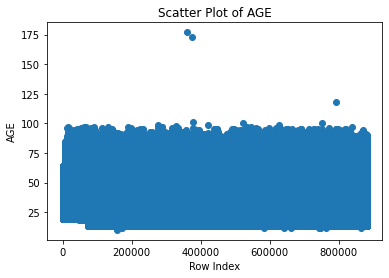

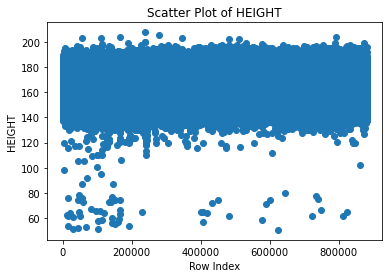

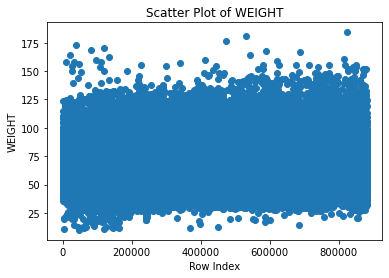

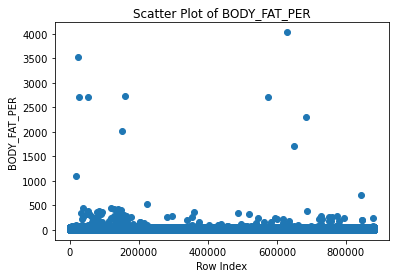

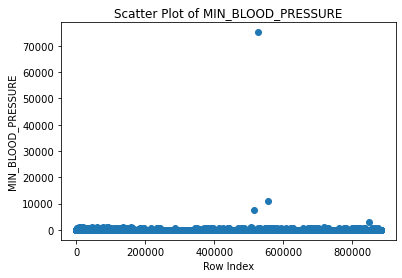

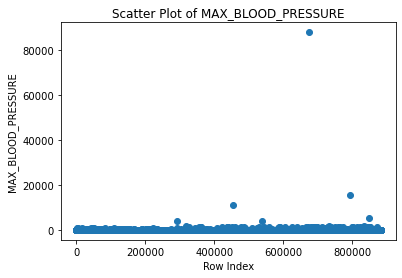

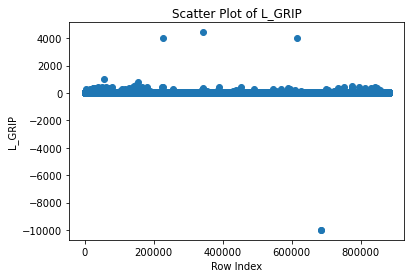

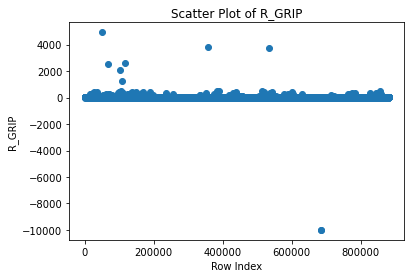

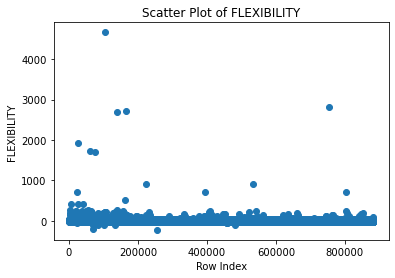

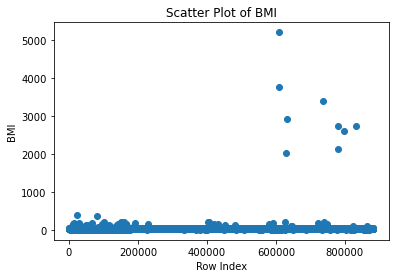

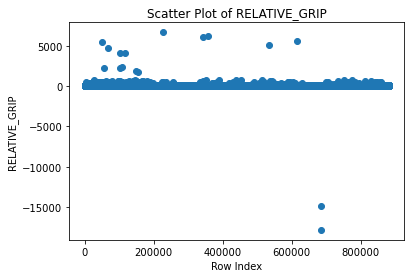

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_1_AFTER.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column_name in numeric_columns:
    plt.figure()
    plt.scatter(df.index, df[column_name], marker='o')
    plt.xlabel('Row Index')
    plt.ylabel(column_name)
    plt.title(f'Scatter Plot of {column_name}')

plt.show()

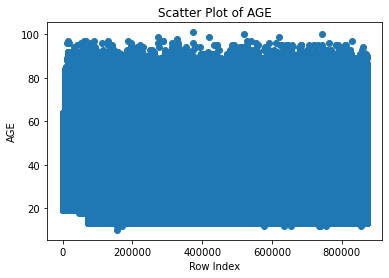

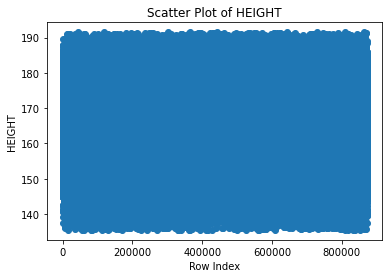

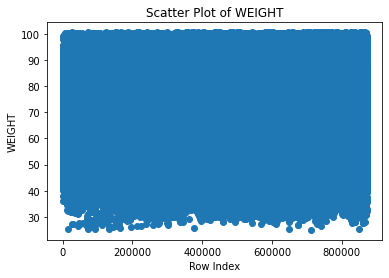

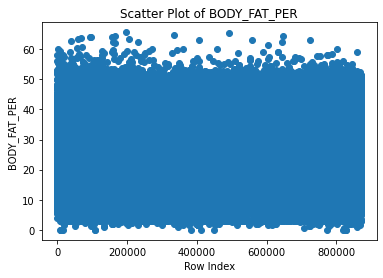

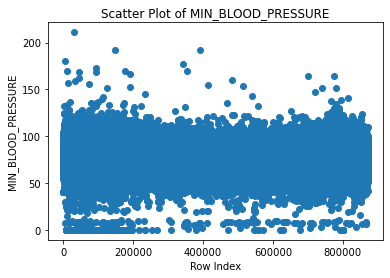

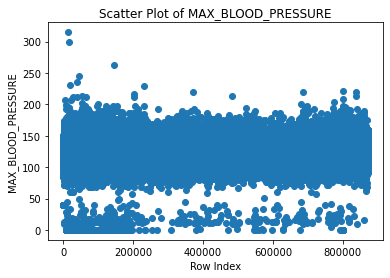

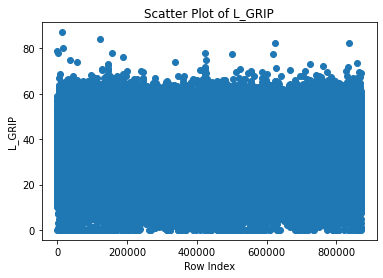

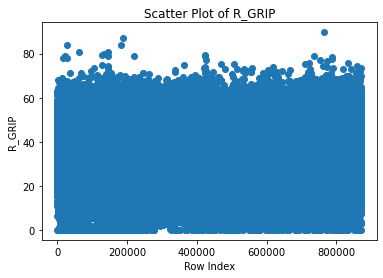

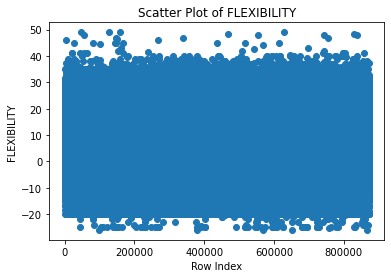

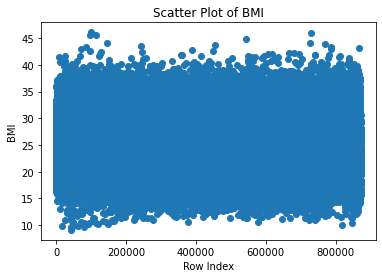

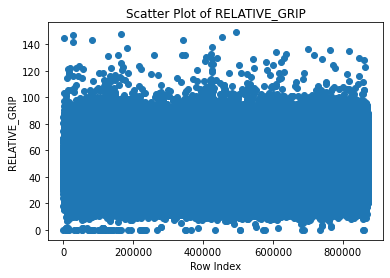

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('운동처방_1.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column_name in numeric_columns:
    plt.figure()
    plt.scatter(df.index, df[column_name], marker='o')
    plt.xlabel('Row Index')
    plt.ylabel(column_name)
    plt.title(f'Scatter Plot of {column_name}')

plt.show()

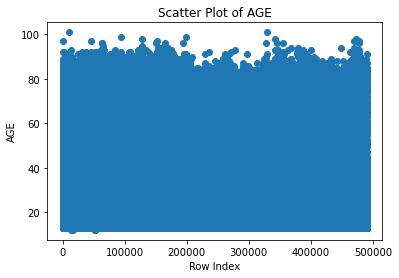

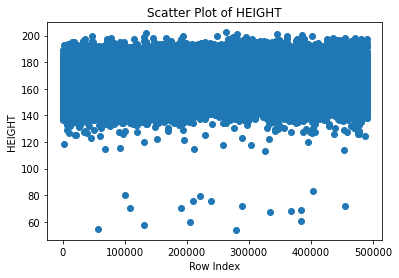

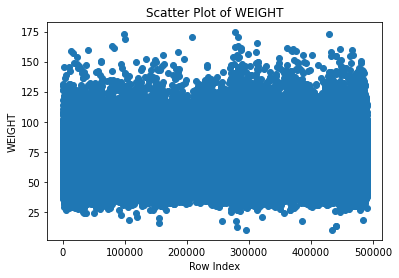

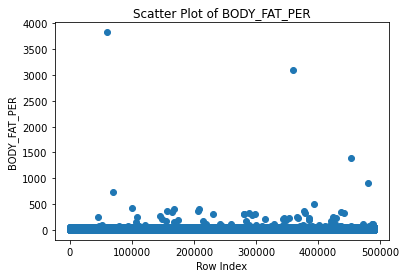

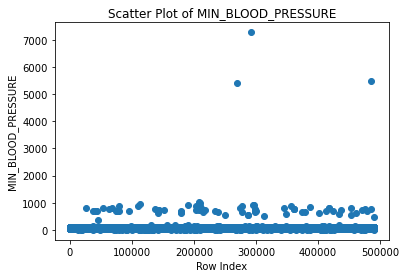

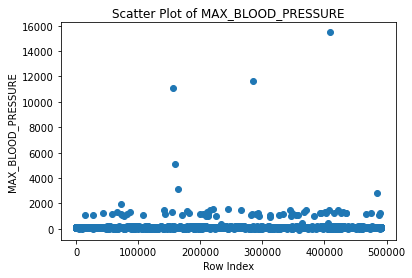

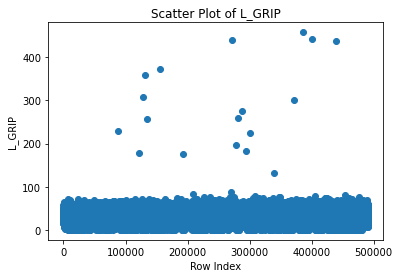

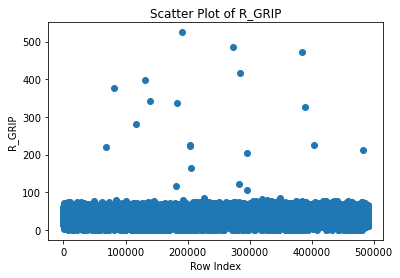

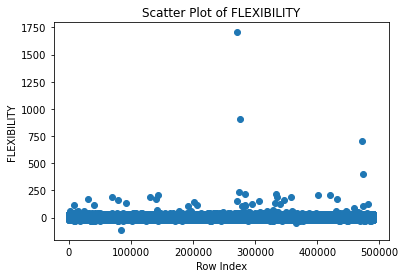

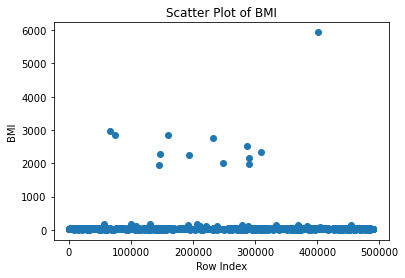

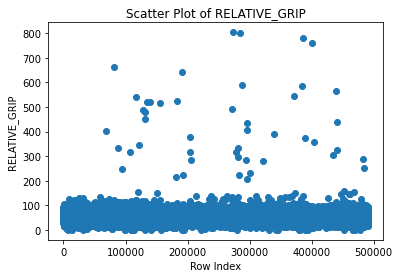

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('EXERCISE_PRESCRIPTION_DATA_2_AFTER.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column_name in numeric_columns:
    plt.figure()
    plt.scatter(df.index, df[column_name], marker='o')
    plt.xlabel('Row Index')
    plt.ylabel(column_name)
    plt.title(f'Scatter Plot of {column_name}')

plt.show()

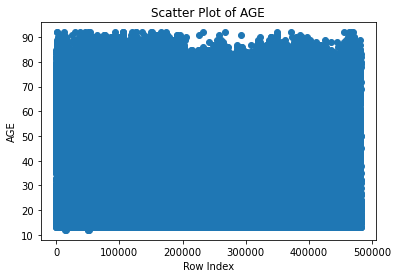

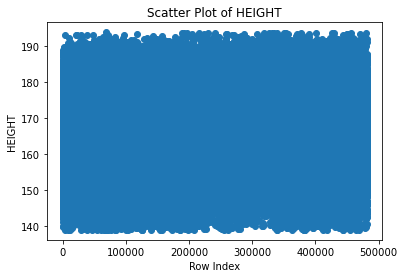

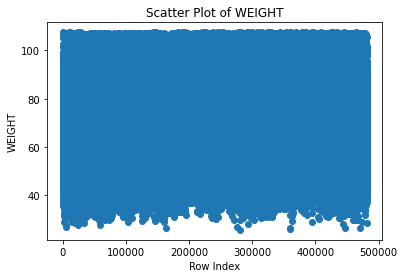

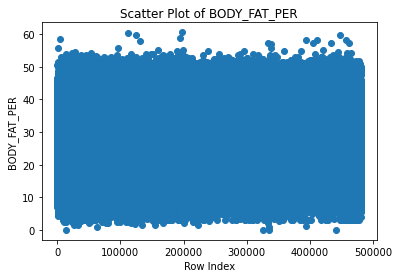

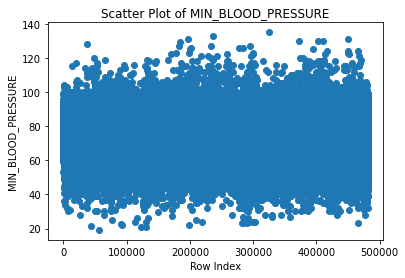

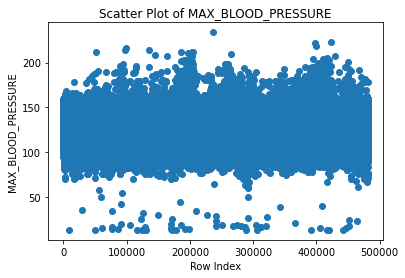

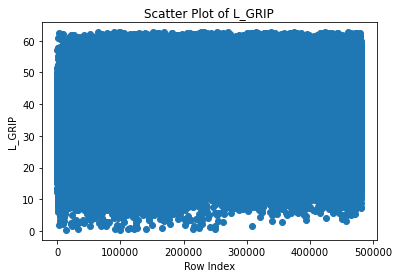

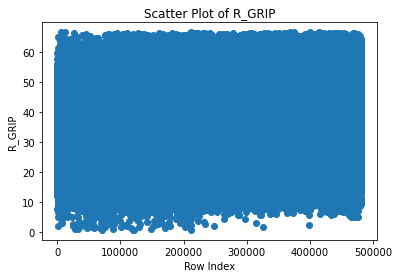

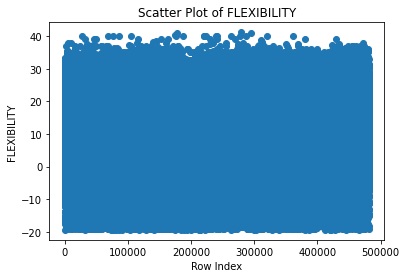

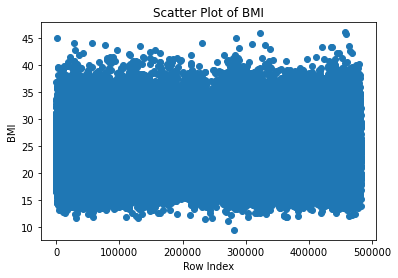

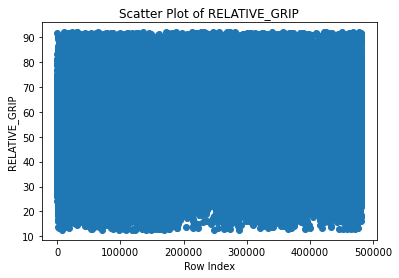

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('운동처방_2.csv')

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column_name in numeric_columns:
    plt.figure()
    plt.scatter(df.index, df[column_name], marker='o')
    plt.xlabel('Row Index')
    plt.ylabel(column_name)
    plt.title(f'Scatter Plot of {column_name}')

plt.show()